In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

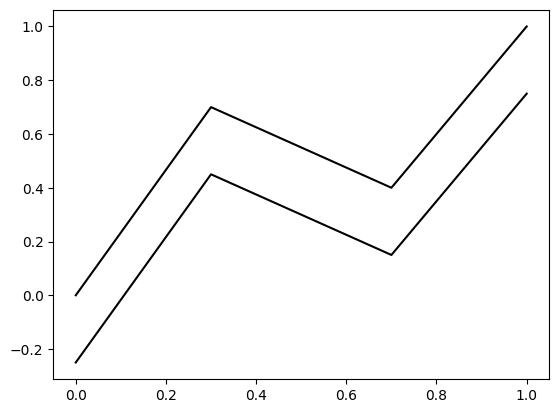

In [ ]:


plt.plot(X, Y, color = 'black')
plt.plot(X, [y - eps for y in Y], color = 'black')

In [306]:
def funcContainedIn(
    a, b, 
    faUpper, fbUpper, 
    faLower, fbLower,
    eps: float, 
    n: int
    ) -> tuple[list[float], list[float]]:

    upperLine = lambda x: (fbUpper-faUpper)/(b-a) * (x-b) + fbUpper - eps
    lowerLine = lambda x: (fbLower-faLower)/(b-a) * (x-b) + fbLower + eps

    X = np.linspace(a, b, n).tolist()
    Y = [(lowerLine if ix%2 == 0 else upperLine)(x) for ix, x in enumerate(X)]

    return X, Y

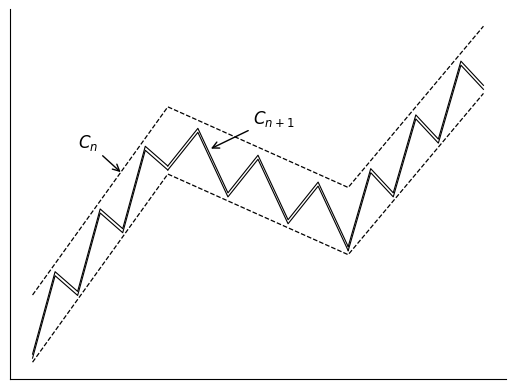

In [390]:
peaks = 100
eps = 0.25

X = [0, 0.3, 0.7, 1]
Y = [0, 0.7, 0.4, 1]

delta = 0.03
n = 7

X0, Y0 = funcContainedIn(
    X[0], X[1], 
    Y[0], Y[1], 
    Y[0] - eps, Y[1] - eps, 
    delta, 
    n
)

X1, Y1 = funcContainedIn(
    X[1], X[2], 
    Y[1], Y[2], 
    Y[1] - eps, Y[2] - eps, 
    delta, 
    n
)

X2, Y2 = funcContainedIn(
    X[2], X[3], 
    Y[2], Y[3], 
    Y[2] - eps, Y[3] - eps, 
    delta, 
    n
)


outParams = {
    'color': 'black',
    'linestyle':'--',
    'linewidth': 0.9
}
plt.plot(X, Y, **outParams)
plt.plot(X, [y - eps for y in Y], **outParams)

inParams = {
    'color': 'black',
    'linewidth': 0.8
}
r = 0.015
plt.plot(X0, Y0, **inParams)
plt.plot(X0, [y-r for y in Y0], **inParams)
plt.plot(X1, Y1,**inParams)
plt.plot(X1, [y-r for y in Y1], **inParams)
plt.plot(X2, Y2, **inParams)
plt.plot(X2, [y-r for y in Y2], **inParams)


x_n, y_n = 0.2,0.45
plt.annotate(r"$C_n$", xy=(x_n, y_n), xytext=(x_n - 0.1, y_n + 0.1),
             arrowprops=dict(arrowstyle="->", color="black"),
             fontsize=12)

x_np1, y_np1 = 0.39, 0.54
plt.annotate(r"$C_{n+1}$", xy=(x_np1, y_np1), xytext=(x_np1 + 0.1, y_np1 + 0.1),
             arrowprops=dict(arrowstyle="->", color="black"),
             fontsize=12)

plt.xticks([])
plt.yticks([])

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()
